In [2]:
pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 4.7 MB/s 
     |████████████████████████████████| 192.9 MB 78 kB/s 
     |████████████████████████████████| 160 kB 61.9 MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=1dee8080ac6ec9ddca1db96b7100ee720c1db4ceaa0852caed364fe875bd7b66
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [29]:
import tpot
print('tpot: %s' % tpot.__version__)

tpot: 0.11.7


In [30]:
import pandas as pd
url = '/content/transfusion.csv'
dataframe = pd.read_csv(url,sep=',')

In [31]:
dataframe

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [32]:
dataframe.rename(columns = {'whether he/she donated blood in March 2007':'target'}, inplace = True)

In [33]:
dataframe

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


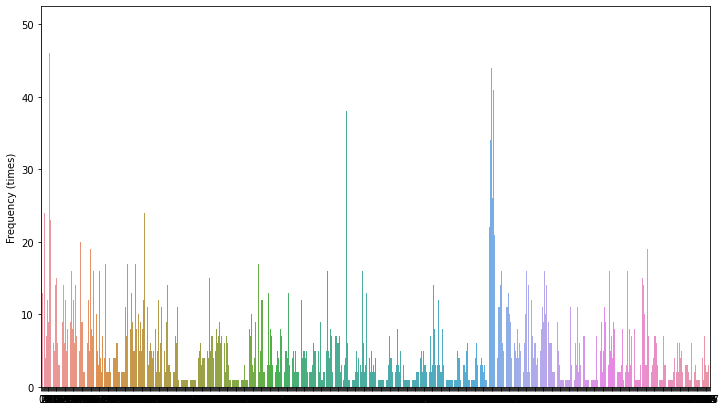

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
import seaborn as sns
sns.barplot(x=dataframe.index, y="Frequency (times)", data=dataframe)
plt.show()

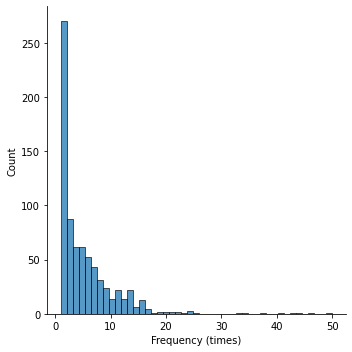

In [35]:
sns.displot(dataframe["Frequency (times)"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


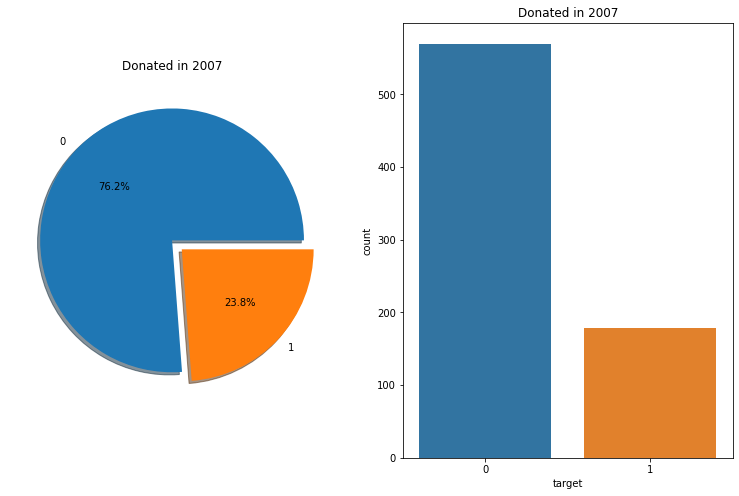

In [36]:
f,ax=plt.subplots(1,2,figsize=(13,8))
dataframe['target'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Donated in 2007')
ax[0].set_ylabel('')
sns.countplot('target',data=dataframe,ax=ax[1])
ax[1].set_title('Donated in 2007')
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataframe.drop(columns='target'),dataframe.target,test_size=0.25,
      random_state=42,stratify=dataframe.target)

In [38]:
from tpot import TPOTClassifier
from sklearn.metrics import roc_auc_score
tpot = TPOTClassifier(
    generations=20,
    population_size=20,
    verbosity=2,
    scoring='roc_auc',
    random_state=42,config_dict='TPOT light')
tpot.fit(X_train, y_train)
tpot_auc_score = roc_auc_score(y_test, tpot.predict_proba(X_test)[:, 1])
print(f'\n auc score: {tpot_auc_score:.4f}')

Optimization Progress:   0%|          | 0/420 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7422459184429089

Generation 2 - Current best internal CV score: 0.7422459184429089

Generation 3 - Current best internal CV score: 0.7422459184429089

Generation 4 - Current best internal CV score: 0.7422459184429089

Generation 5 - Current best internal CV score: 0.7456308339276876

Generation 6 - Current best internal CV score: 0.7464101394881147

Generation 7 - Current best internal CV score: 0.7464101394881147

Generation 8 - Current best internal CV score: 0.7464101394881147

Generation 9 - Current best internal CV score: 0.7464101394881147

Generation 10 - Current best internal CV score: 0.7464101394881147

Generation 11 - Current best internal CV score: 0.7464101394881147

Generation 12 - Current best internal CV score: 0.7464101394881147

Generation 13 - Current best internal CV score: 0.7477968360868498

Generation 14 - Current best internal CV score: 0.7477968360868498

Generation 15 - Current best internal CV score: 0.747796

In [39]:
import numpy as np
X_train_normed, X_test_normed = X_train.copy(), X_test.copy()
dataframe['monetary_log'] = np.log(dataframe['Monetary (c.c. blood)'])
dataframe.drop(columns='Monetary (c.c. blood)', inplace=True)
X_train_normed,X_test_normed,y_train,y_test=train_test_split(dataframe.drop(columns='target'),dataframe.target,test_size=0.25,random_state=42,stratify=dataframe.target)
print(X_train_normed.var())

Recency (months)      66.929017
Frequency (times)     33.829819
Time (months)        611.146588
monetary_log           0.837458
dtype: float64


In [41]:
from sklearn import linear_model
model = linear_model.LogisticRegression(solver='liblinear')
model.fit(X_train_normed, y_train)
model_auc_score = roc_auc_score(y_test, model.predict_proba(X_test_normed)[:, 1])
print(f'\nAUC score: {model_auc_score:.4f}')


AUC score: 0.7890
